# Experimento #3
## Termistores

### Nome: João Vitor Rodrigues Baptista
### Matricula: 15/0013329

Objetivo: Introdução ao conceito de coeficiente térmico de dispositivos e à variação da resistividade de materiais condutores e semicondutores em função da temperatura. Caracterização elétrica, de termistores PTC (Positive Temperature Coefficient) e NTC (Negative Temperature Coefficient). 

Importando os dados

In [1]:
mV = 10**-3
V = 1

dict_data = {
    'Vdc[V]': [0, 0.5, 1.0, 1.5, 2.0, 2.5],
    'Va[V]': [0, 502*mV, 1006*mV, 1505*mV, 2.02*V, 2.51*V],
    'Vb[V]': [0, 41.9*mV, 156.4*mV, 338*mV, 583*mV, 892*mV]
}

r2 = 1.00

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math

warnings.filterwarnings('ignore')

In [3]:
data_df = pd.DataFrame.from_dict(dict_data)
data_df.head()

,Vdc[V],Va[V],Vb[V]
0,0.0,0.000,0.0000
1,0.5,0.502,0.0419
2,1.0,1.006,0.1564
3,1.5,1.505,0.3380
4,2.0,2.020,0.5830


Para fazer o preenchimento dos restantes dos dados será utilizados as seguintes formulas:

$$ V_{AB}[V] = V_{A}[V] - V_{B}[V]  $$


$$ I[A] = \frac{V_{B}[V]}{R_{2}} $$ 


$$ R_{1}[\Omega] = \frac{R_{2}(V_{A}[V] - V_{B}[V])}{V_{B}[V]} $$ 


$$ P_{1}[W] = \frac{V_{AB}[V]^{2}}{R_{1}[\Omega]} $$ 


In [4]:
# Dados do Termistor NTC 10D-9
rinf = 0.458 #[ohms]
R0 = 10; #[ohms]
T0 = 298.15 #[K] ou 25 graus centígrados
B = T0*math.log(R0/rinf) #//[K]


def calculo_f(row, r2):
    '''Função para fazer o preenchimento dos dados completo da tabela'''
    try:
        Vab = row['Va[V]'] - row['Vb[V]']

        I = row['Vb[V]']/r2

        R1 = (r2*Vab)/row['Vb[V]']

        P1 = (Vab**2)/R1

        row['Vab[V]'] = Vab
        row['I[A]'] = I
        row['R1[OHMS]'] = R1
        row['P1[W]'] = P1
        row['T[K]'] = B*(math.log(R1*rinf))
    
    except ZeroDivisionError:
        row['Vab[V]'] = 0
        row['I[A]'] = 0
        row['R1[OHMS]'] = 0
        row['P1[W]'] = 0
        row['T[K]'] = 0
    
    return row

In [5]:
full_data_df = data_df.apply(lambda row : calculo_f(row, r2), axis = 1)

#### 1) Estabeleça um método experimental simples para identificar termistores que possuem coeficientes positivos (PTC) ou coeficientes negativos (NTC). Descreva o seu método na forma de um diagrama

$$ a_{t} = \frac{1}{R(T)}\frac{dR}{dT} $$ 

O que determina se um termistor é NTC ou PTC é o coeficiente at, na equação aceaima que determina a inclinação da reta  que varia com a temperatura. Quando o tesmistor é PTC, varia a resistência positivamente com o aumento da temperatura, at assume valores posistivos, no NTC onde o efeito é o contrário at assume valores negativos. Sendo assim, para determinar um tipo de termistor basta variar a temperatura do componente e observar a queda de tensão e de corrente, determinando se a resistência está aumentando ou diminuindo.

![Diagrama](fds_diagram.png)

#### 2) Monte o circuito da figura, e realize as medidas com o termistor NTC (R 1 ) das tensões V A e V B com o multímetro, sempre com a melhor escala, e sempre aumentando V DC . Calcule os valores da tensão V AB , da corrente I, e da resistência R 1 . Não faça medidas além de 1,0 ampere ( I < 1,0A )

In [6]:
full_data_df = full_data_df.replace(np.nan, 0)
full_data_df

,Vdc[V],Va[V],Vb[V],Vab[V],I[A],R1[OHMS],P1[W],T[K]
0,0.0,0.000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000
1,0.5,0.502,0.0419,0.4601,0.0419,10.980907,0.019278,1484.979150
2,1.0,1.006,0.1564,0.8496,0.1564,5.432225,0.132877,837.941350
3,1.5,1.505,0.3380,1.1670,0.3380,3.452663,0.394446,421.295014
4,2.0,2.020,0.5830,1.4370,0.5830,2.464837,0.837771,111.460047
5,2.5,2.510,0.8920,1.6180,0.8920,1.813901,1.443256,-170.450703


#### 3) Plote o gráfico dos pontos experimentais da Corrente I [A] x Tensão V AB [V], para o termistor NTC.

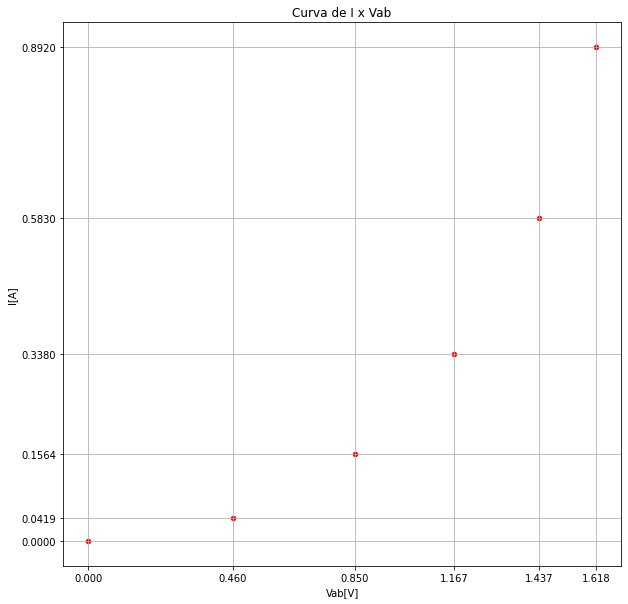

In [7]:
full_data_df.plot(kind='scatter',y='I[A]',x='Vab[V]',color='red', grid=True, title='Curva de I x Vab', legend=True, xticks=full_data_df['Vab[V]'], yticks=full_data_df['I[A]'], figsize=(10,10) )
plt.show()

#### 4) Plote os valores experimentais da resistência R 1 [] do NTC em função das Temperaturas T [K] calculadas a partir do modelo de Steinhart-Hart, usando os parâmetros fornecidos pelo fabricante (r ∞ , R 0 , T 0 ) para o seu termistor. Plote no mesmo gráfico a curva R 1 [] x T [K] do modelo. Use o programa Scilab disponibilizado.

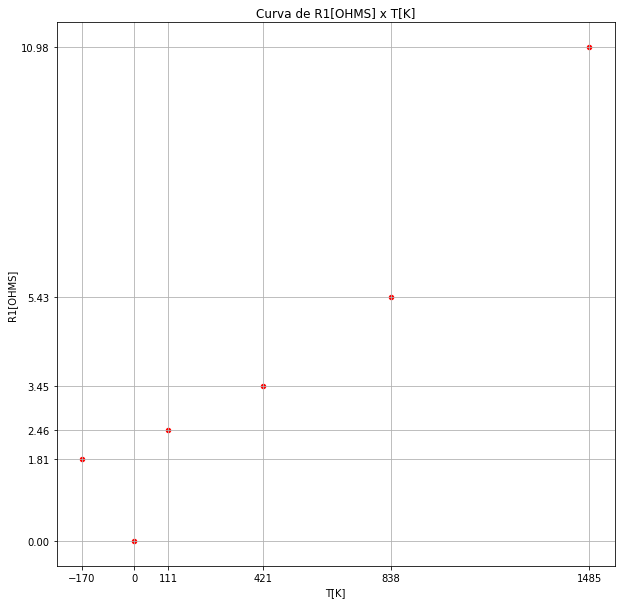

In [8]:
full_data_df.plot(kind='scatter',y='R1[OHMS]',x='T[K]',color='red', grid=True, title='Curva de R1[OHMS] x T[K]', legend=True, xticks=full_data_df['T[K]'], yticks=full_data_df['R1[OHMS]'], figsize=(10,10) )
plt.show()

#### 4) Modelo

In [9]:
tc = np.linspace(min(full_data_df['T[K]']), max(full_data_df['T[K]']), num=100)
rc1 = rinf*(np.exp(B/tc))

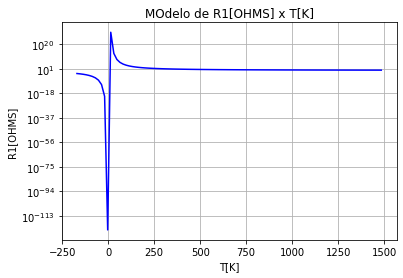

In [10]:
plt.title("MOdelo de R1[OHMS] x T[K]")  
plt.xlabel("T[K]")  
plt.ylabel("R1[OHMS]")  
plt.plot(tc, rc1, color ="blue")
plt.rcParams["figure.figsize"] = (20,10)
plt.grid(True)
plt.yscale('log')
plt.show()

## 5) Responda:

#### a) Pesquisa: Descreva como termistores NTC e PTC podem ser usados para medir a temperatura. Proponha um circuito de medida e descreva como este Termômetro Eletrônico funciona.

$$ a_{t} = \frac{1}{R(T)}\frac{dR}{dT} $$ 

O que determina se um termistor é NTC ou PTC é o coeficiente at, na equação aceaima que determina a inclinação da reta  que varia com a temperatura. Quando o tesmistor é PTC, varia a resistência positivamente com o aumento da temperatura, at assume valores posistivos, no NTC onde o efeito é o contrário at assume valores negativos. Sendo assim, para determinar um tipo de termistor basta variar a temperatura do componente e observar a queda de tensão e de corrente, determinando se a resistência está aumentando ou diminuindo.

Dessa forma o exemplo do experimento pode ser um circuito que medir temperatura, apenas fazendo um a aferiação da corrente pode entender o quanto esta a temperatura do ambiente.

#### b) Pesquisa: Compare os principais materiais que são usados na fabricação de termistores PTC e NTC. Cite as suas fontes, relatando a composição, o mecanismo de sensibilidade à temperatura, e como são construídos.

Já os termistores são fabricados de material semicondutor, tais como óxido de níquel, cobalto ou magnésio e sulfeto de ferro. Os óxidos semicondutores reagem de forma diferente do que os metais que formam os RTDs, para o NTC a resistência descresce exponencialmente com o aumento da temperatura.